In [1]:
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
%matplotlib inline

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


ImportError: cannot import name 'urlencode'

In [15]:
stock = ['AAPL']

In [13]:
data = web.DataReader(stock, data_source='yahoo', start='01/01/2010')['Adj Close']

RemoteDataError: No data fetched using 'YahooDailyReader'

In [5]:
data.sort_index(inplace=True)

NameError: name 'data' is not defined

In [6]:
returns = data.pct_change()

In [9]:
mean_return = returns.mean()
return_stdev = returns.std()

In [10]:
annualised_return = round(mean_return * 252,2)
annualised_stdev = round(return_stdev * np.sqrt(252),2)

In [11]:
print ('The annualised mean return of stock {} is {}, ' 
        'and the annualised volatility is {}').format(stock[0],annualised_return,annualised_stdev)

The annualised mean return of stock AAPL is 0.29, and the annualised volatility is 0.26


In [17]:
stocks = ['AAPL','AMZN','MSFT','GOOG']

In [18]:
data = web.DataReader(stocks, data_source='yahoo', start='01/01/2010')['Adj Close']

In [19]:
data.sort_index(inplace=True)

In [21]:
returns = data.pct_change()

In [22]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [23]:
weights = np.asarray([0.5,0.2,0.2,0.1])

In [24]:
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

In [25]:
print('Portfolio expected annualised return is {} and volatility is {}').format(portfolio_return,portfolio_std_dev)

Portfolio expected annualised return is 0.27 and volatility is 0.2


In [27]:
num_portfolios = 25000
results = np.zeros((3,num_portfolios))

In [29]:
for i in xrange(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]

In [30]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

In [31]:
results_frame.head()

ret     stdev    sharpe
0  0.298040  0.221627  1.344778
1  0.241123  0.198099  1.217182
2  0.249568  0.201696  1.237346
3  0.252449  0.196548  1.284417
4  0.258688  0.203476  1.271345

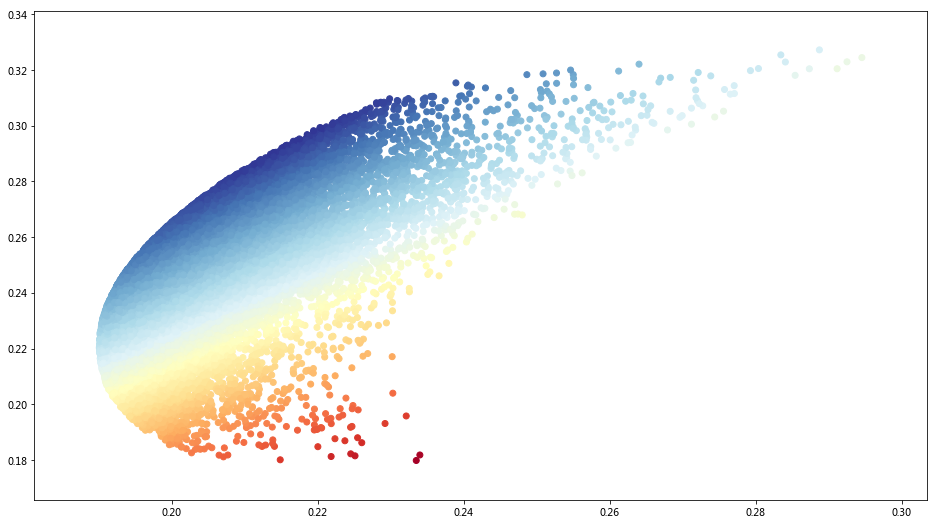

In [33]:
plt.figure(figsize=(16, 9))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')

In [34]:
num_portfolios = 25000
results = np.zeros((4+len(stocks)-1,num_portfolios))

In [35]:
for i in xrange(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [36]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

In [37]:
results_frame.head()

ret     stdev    sharpe      AAPL      AMZN      MSFT      GOOG
0  0.239972  0.207778  1.154946  0.050620  0.335943  0.136501  0.476936
1  0.254684  0.204211  1.247164  0.258274  0.300283  0.310663  0.130780
2  0.197000  0.196798  1.001024  0.069555  0.057276  0.423677  0.449491
3  0.239908  0.209927  1.142816  0.131686  0.297634  0.447043  0.123637
4  0.230080  0.202923  1.133830  0.076789  0.265424  0.353757  0.304030

### locate position of portfolio with highest Sharpe Ratio

In [38]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

### locate positon of portfolio with minimum standard deviation

In [39]:
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

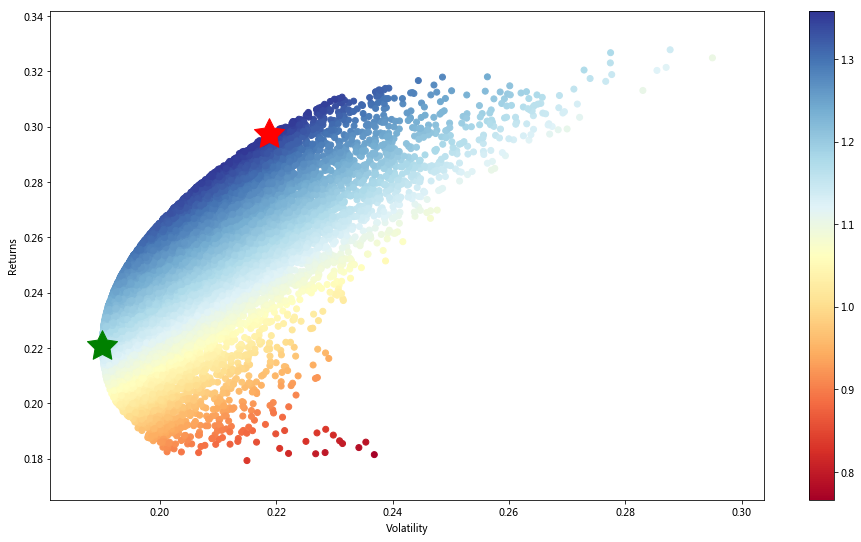

In [40]:
plt.figure(figsize=(16, 9))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [41]:
print(max_sharpe_port)

ret       0.297256
stdev     0.218755
sharpe    1.358857
AAPL      0.514468
AMZN      0.387031
MSFT      0.004234
GOOG      0.094267
Name: 5768, dtype: float64


In [42]:
print(min_vol_port)

ret       0.220805
stdev     0.190107
sharpe    1.161481
AAPL      0.276538
AMZN      0.063026
MSFT      0.267024
GOOG      0.393413
Name: 22607, dtype: float64


# Portfolio Optimization

In [103]:
def calcPortfolioPerf(weights, meanReturns, covMatrix):
    '''
    Calculates the expected mean of returns and volatility for a portolio of
    assets, each carrying the weight specified by weights

    INPUT
    weights: array specifying the weight of each asset in the portfolio
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio

    OUTPUT
    tuple containing the portfolio return and volatility
    '''    
    #Calculate return and variance

    portReturn = np.sum( meanReturns*weights ) * 252
    portStdDev = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights))) * np.sqrt(252)

    return portReturn, portStdDev

In [104]:
def negSharpeRatio(weights, meanReturns, covMatrix, riskFreeRate):
    '''
    Returns the negated Sharpe Ratio for the speicified portfolio of assets

    INPUT
    weights: array specifying the weight of each asset in the portfolio
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    riskFreeRate: time value of money
    '''
    p_ret, p_var = calcPortfolioPerf(weights, meanReturns, covMatrix)

    return -(p_ret - riskFreeRate) / p_var

In [105]:
def getPortfolioVol(weights, meanReturns, covMatrix):
    '''
    Returns the volatility of the specified portfolio of assets

    INPUT
    weights: array specifying the weight of each asset in the portfolio
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio

    OUTPUT
    The portfolio's volatility
    '''
    return calcPortfolioPerf(weights, meanReturns, covMatrix)[1]

In [106]:
def findMaxSharpeRatioPortfolio(meanReturns, covMatrix, riskFreeRate):
    '''
    Finds the portfolio of assets providing the maximum Sharpe Ratio

    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    riskFreeRate: time value of money
    '''
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple( (0,1) for asset in range(numAssets))

    opts = sco.minimize(negSharpeRatio, numAssets*[1./numAssets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return opts

In [107]:
def findMinVariancePortfolio(meanReturns, covMatrix):
    '''
    Finds the portfolio of assets providing the lowest volatility

    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    '''
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple( (0,1) for asset in range(numAssets))

    opts = sco.minimize(getPortfolioVol, numAssets*[1./numAssets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return opts

In [108]:
maxSharpe = findMaxSharpeRatioPortfolio(returns.mean(), returns.cov(), 0.0)

In [109]:
maxSharpe

     fun: -1.359572704449146
     jac: array([-0.00017409,  0.0002912 ,  0.09881017, -0.00018258])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 0.50667541,  0.37627249,  0.        ,  0.11705209])

In [112]:
rp, sdp = calcPortfolioPerf(maxSharpe['x'], returns.mean(), returns.cov())

In [113]:
print rp, sdp

0.294840739199 0.216862796843


In [114]:
minVar = findMinVariancePortfolio(returns.mean(), returns.cov())

In [115]:
rp_min, sdp_min = calcPortfolioPerf(minVar['x'], returns.mean(), returns.cov())

In [116]:
print rp_min, sdp_min

0.220778087906 0.190101896491


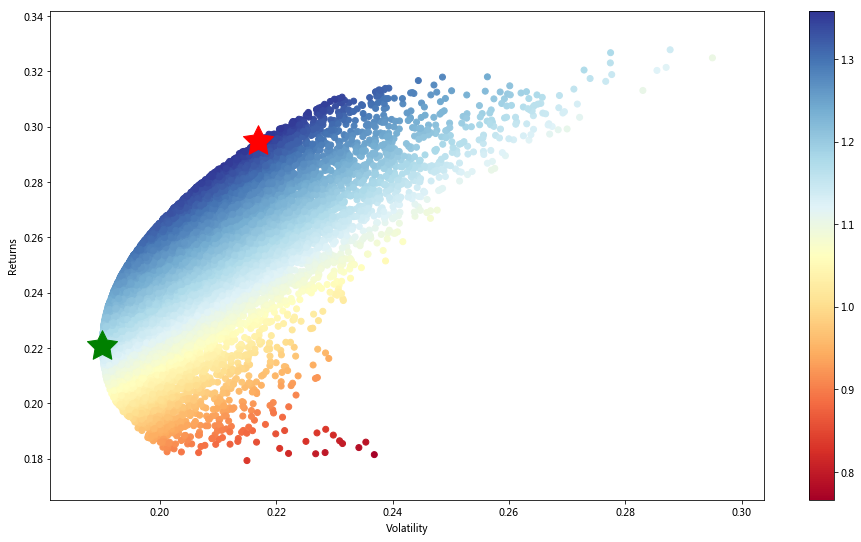

In [117]:
plt.figure(figsize=(16, 9))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(sdp,rp,marker=(5,1,0),color='r',s=1000)
plt.scatter(sdp_min,rp_min,marker=(5,1,0),color='g',s=1000)

# Find efficient frontier

In [118]:
def findEfficientReturn(meanReturns, covMatrix, targetReturn):
    '''
    Finds the portfolio of assets providing the target return with lowest
    volatility

    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    targetReturn: APR of target expected return

    OUTPUT
    Dictionary of results from optimization
    '''
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix)

    def getPortfolioReturn(weights):
        return calcPortfolioPerf(weights, meanReturns, covMatrix)[0]

    constraints = ({'type': 'eq', 'fun': lambda x: getPortfolioReturn(x) - targetReturn},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(numAssets))

    return sco.minimize(getPortfolioVol, numAssets*[1./numAssets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

In [119]:
def findEfficientFrontier(meanReturns, covMatrix, rangeOfReturns):
    '''
    Finds the set of portfolios comprising the efficient frontier

    INPUT
    meanReturns: mean values of each asset's returns
    covMatrix: covariance of each asset in the portfolio
    targetReturn: APR of target expected return

    OUTPUT
    Dictionary of results from optimization
    '''
    efficientPortfolios = []
    for ret in rangeOfReturns:
        efficientPortfolios.append(findEfficientReturn(meanReturns, covMatrix, ret))

    return efficientPortfolios

In [127]:
targetReturns = np.linspace(rp_min, 0.32, 50)

In [128]:
targetReturns

array([ 0.22077809,  0.22280302,  0.22482796,  0.2268529 ,  0.22887784,
        0.23090277,  0.23292771,  0.23495265,  0.23697758,  0.23900252,
        0.24102746,  0.24305239,  0.24507733,  0.24710227,  0.24912721,
        0.25115214,  0.25317708,  0.25520202,  0.25722695,  0.25925189,
        0.26127683,  0.26330176,  0.2653267 ,  0.26735164,  0.26937658,
        0.27140151,  0.27342645,  0.27545139,  0.27747632,  0.27950126,
        0.2815262 ,  0.28355113,  0.28557607,  0.28760101,  0.28962595,
        0.29165088,  0.29367582,  0.29570076,  0.29772569,  0.29975063,
        0.30177557,  0.3038005 ,  0.30582544,  0.30785038,  0.30987532,
        0.31190025,  0.31392519,  0.31595013,  0.31797506,  0.32      ])

In [129]:
efficientPortfolios = findEfficientFrontier(returns.mean(), returns.cov(), targetReturns)

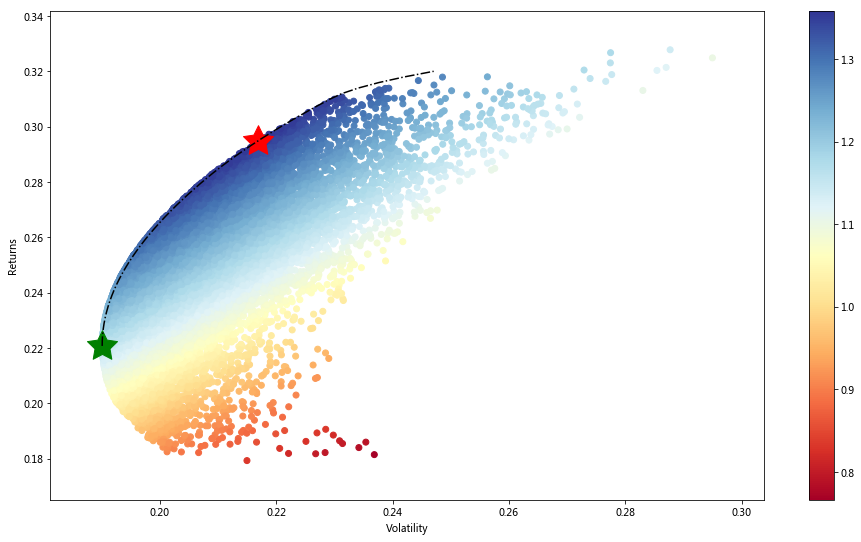

In [130]:
plt.figure(figsize=(16, 9))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.plot([p['fun'] for p in efficientPortfolios], targetReturns, linestyle='-.', color='black', label='efficient frontier')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(sdp,rp,marker=(5,1,0),color='r',s=1000)
plt.scatter(sdp_min,rp_min,marker=(5,1,0),color='g',s=1000)